In [1]:
###Arima Implementation
import numpy as np
import matplotlib.pyplot as plt
import torch
import sigkernel

In [ ]:
    # Simulate ARMA data manually.
    
    # Parameters:
    #     n_samples (int): Number of samples to generate.
    #     ar_coefs (list): AR coefficients [phi_1, phi_2, ..., phi_p].
    #     ma_coefs (list): MA coefficients [theta_1, theta_2, ..., theta_q].
    #     noise_std (float): Standard deviation of the white noise.
    
    # Returns:
    #     np.array: Simulated ARMA data.
    #

In [ ]:
def ARMA(n, ar, ma, noisestd=1.0, burnin =100):
    p = len(ar)  # AR order
    q = len(ma)  # MA order
    
    N = n+burnin

    y = np.zeros(N)  # Initialize time series
    epsilon = np.random.normal(0, noisestd, N)  # White noise
    

    for t in range(max(p, q),  N):
        # AR component
        arcomp = sum(ar[i] * y[t - i - 1] for i in range(p))
        # MA component
        macomp = sum(ma[j] * epsilon[t - j - 1] for j in range(q))
        # ARMA equation
        y[t] = arcomp + epsilon[t] + macomp
    
    return y[burnin:]

def difference(data, d=1):
    for num in range(d):
        data = np.diff(data)
    return data

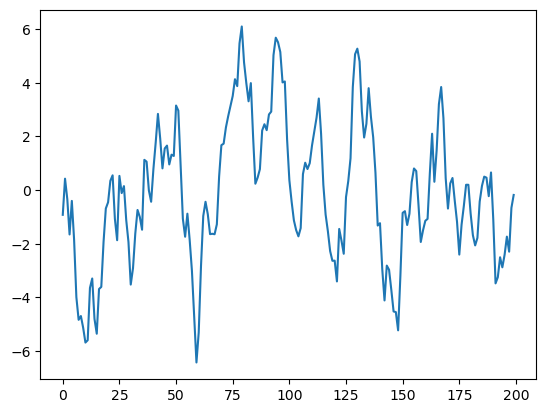

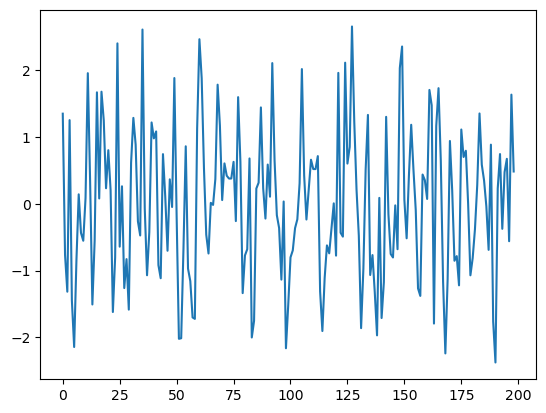

In [66]:
n=200
ar = [0.85]
ma = [0.4]

data =ARMA(n,ar,ma)

plt.plot(data)
plt.show()

datadif = difference(data)

plt.plot(datadif)
plt.show()

[-0.92248614  0.4258784  -0.33956447 -1.65554202 -0.40365751 -1.849523
 -3.9934349  -4.84068968 -4.6996661  -5.13620362 -5.68934936 -5.60330251
 -3.64895375 -3.29912271 -4.80653752 -5.35974925 -3.6919654  -3.61258128
 -1.93541671 -0.68701231 -0.45488072  0.34699326  0.55109374 -1.06901368
 -1.87054238  0.52976014 -0.11230471  0.14907673 -1.11260565 -1.94106669
 -3.52544741 -2.91194048 -1.6266353  -0.74090129 -1.00416246 -1.47854081
  1.12901538  1.06060655 -0.00941532 -0.43466891  0.78218146  1.76068351
  2.84283881  1.92473083  0.81030397  1.55312412  1.66011457  0.95677707
  1.32230863  1.27384121  3.15549308  2.96700567  0.94571245 -1.06709898
 -1.74061057 -0.8806086  -1.85124885 -3.00844161 -4.70958581 -6.4325474
 -5.30977014 -2.84708766 -0.96777657 -0.43660809 -0.89911451 -1.64357064
 -1.63019372 -1.64709786 -1.27673386  0.50568438  1.67672094  1.73218209
  2.33614275  2.75589862  3.13290291  3.51101883  4.13822953  3.8789328
  5.47470778  6.10514775  4.76768336  3.99403638  3.313

In [81]:
initial = datadif[:-10]
initial.shape[0]
len(initial)

189

In [ ]:
def testingloss(datadif, pathlength,theta):

    initial = datadif[:-pathlength]
    #print(initial.shape)
    #print(np.arange(pathlength)+1)                    # shape (N,)
    powers = theta ** (np.arange(pathlength)+1)
    #print(powers)            # shape (pathlength,)
    
    predictions = initial[:, None] * powers[None, :]

    return predictions

In [190]:
def computescore(newdata,data,pathlength):
    windows = np.lib.stride_tricks.sliding_window_view(data, window_shape=pathlength)
    truth = windows[1:]
    
    lengths = newdata.shape[0]
    meandist = 0
    for i in range(lengths):
        obs = truth[i,:]
        forecast = newdata[i,:]

        static_kernel = sigkernel.Linear_ID_Kernel()
        dyadic_order = 2
        signature_kernel = sigkernel.SigKernel(static_kernel, dyadic_order)

        forecast = np.expand_dims(forecast,axis=0)
        forecast = sigkernel.transform(forecast,at=True)
        obs = np.expand_dims(obs,axis=0)
        obs = sigkernel.transform(obs,at=True)
        obs = torch.tensor(obs)
        forecast= torch.tensor(forecast)

        dist = signature_kernel.compute_distance(forecast,obs)
        distscale = dist/lengths
        meandist += distscale
    
    return(meandist)


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55


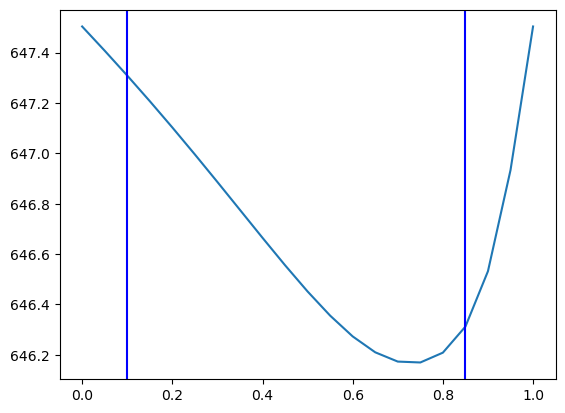

In [211]:
n=200
ar = [0.1]
ma = [0.4]

iterations = 5

vals = 21
theta = np.linspace(0,1,vals)
print(theta)
averagescore = np.zeros(vals)

for iteration in range(iterations):
    data =ARMA(n,ar,ma)

    for i in range(vals):
        print(theta[i])
        newdata = testingloss(data,10,theta[i])
        score = computescore(newdata,data,10)/iterations
        averagescore[i]+=score

averagescore

plt.plot(theta,averagescore)
plt.axvline(x = 0.85, color = 'b', label = 'axvline - full height')
plt.axvline(x = 0.1, color = 'b', label = 'axvline - full height')
plt.show()

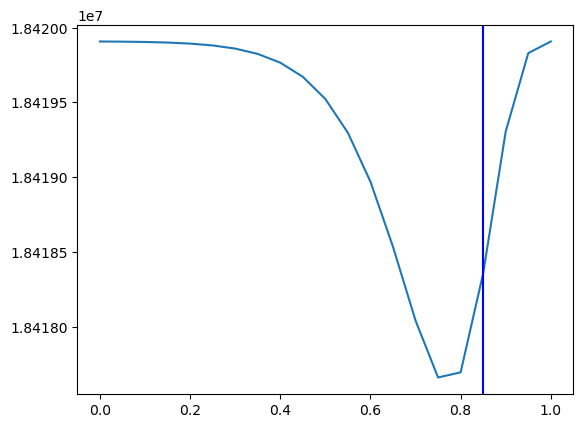

In [208]:
plt.plot(theta,averagescore)
plt.axvline(x = 0.85, color = 'b', label = 'axvline - full height')
plt.show()

In [203]:
np.linspace(0,1,21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [113]:
windows = np.lib.stride_tricks.sliding_window_view(data, window_shape=10)
truth = windows[1:]

In [119]:
truth.shape[0]

190

In [117]:
newdata.shape

(190, 10)

In [178]:
total = computescore(newdata,data,10)
total

(190, 10)
(190, 10)


tensor(212927.6518, dtype=torch.float64)

In [164]:
obs = truth[0,:]
forecast = newdata[0,:]

static_kernel = sigkernel.Linear_ID_Kernel()
dyadic_order = 2
signature_kernel = sigkernel.SigKernel(static_kernel, dyadic_order)

obs.shape
forecast = np.expand_dims(forecast,axis=0)
forecast = sigkernel.transform(forecast,at=True)
obs = np.expand_dims(obs,axis=0)
obs = sigkernel.transform(obs,at=True)
obs = torch.tensor(obs)
forecast= torch.tensor(forecast)

#print(obs)
#print(forecast)

# signature_kernel.compute_kernel(obs,forecast)
# signature_kernel.compute_Gram()

#signature_kernel.compute_kernel(obs,forecast)
#signature_kernel.compute_Gram()

print(signature_kernel.compute_distance(forecast,obs))


tensor(29984.6594, dtype=torch.float64)


In [ ]:
def compute_scoring_rule(self, X, y, max_batch=100):
        """Input:
                  - X: torch tensor of shape (batch, length_X, dim),
                  - y: torch tensor of shape (1, length_Y, dim)
           Output:
                  - signature kernel scoring rule S(X,y) = E[k(X,X)] - 2E[k(X,y]
        """

        assert not y.requires_grad, "the second input should not require grad"

        K_XX = self.compute_Gram(X, X, sym=True, max_batch=max_batch)
        K_Xy = self.compute_Gram(X, y, sym=False, max_batch=max_batch)

        K_XX_m = (torch.sum(K_XX) - torch.sum(torch.diag(K_XX))) / (K_XX.shape[0] * (K_XX.shape[0] - 1.))

        return K_XX_m - 2. * torch.mean(K_Xy)

obs = truth[i,:]
forecast = newdata[i:]

static_kernel = sigkernel.Linear_ID_Kernel()
dyadic_order = 2
signature_kernel = sigkernel.SigKernel(static_kernel, dyadic_order)